In [1]:
import sys
import os
import numpy as np
from os.path import join
from pathlib import Path
from scipy.stats import pearsonr

root = Path(os.getcwd()).parent.parent
sys.path.append(str(root))

In [2]:
from matplotlib import font_manager, rc
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from PIL import Image
from matplotlib.pyplot import imshow

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import hashlib
import math
import h5py

### Results

In [3]:
result_path = join(root, 'results', 'old_model', 'all', 'all')

f = h5py.File(join(result_path, 'prediction.h5'), 'r')
prediction = f.get('prediction').value
true = f.get('true').value
start_date = f.get('start_date').value
start_date = datetime(start_date[0], start_date[1], start_date[2])

<ipython-input-3-f7c4540f1501>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  prediction = f.get('prediction').value
<ipython-input-3-f7c4540f1501>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  true = f.get('true').value
<ipython-input-3-f7c4540f1501>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  start_date = f.get('start_date').value


In [4]:
print(prediction.shape, true.shape, start_date)

(15, 256, 256) (15, 256, 256) 2020-04-06 00:00:00


In [5]:
for row in range(prediction.shape[1]):
    if row % 10 != 0: continue
    for col in range(prediction.shape[2]):
        if col % 10 != 0: continue
        print('%02d' % int(prediction[7][row][col]), end=' ')
    print()
print()

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 02 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
01 01 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 02 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 01 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 01 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 0

In [6]:
for row in range(prediction.shape[1]):
    if row % 10 != 0: continue
    for col in range(prediction.shape[2]):
        if col % 10 != 0: continue
        print('%02d' % int(true[7][row][col]), end=' ')
    print()
print()

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
05 05 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
02 02 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 01 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 05 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 0

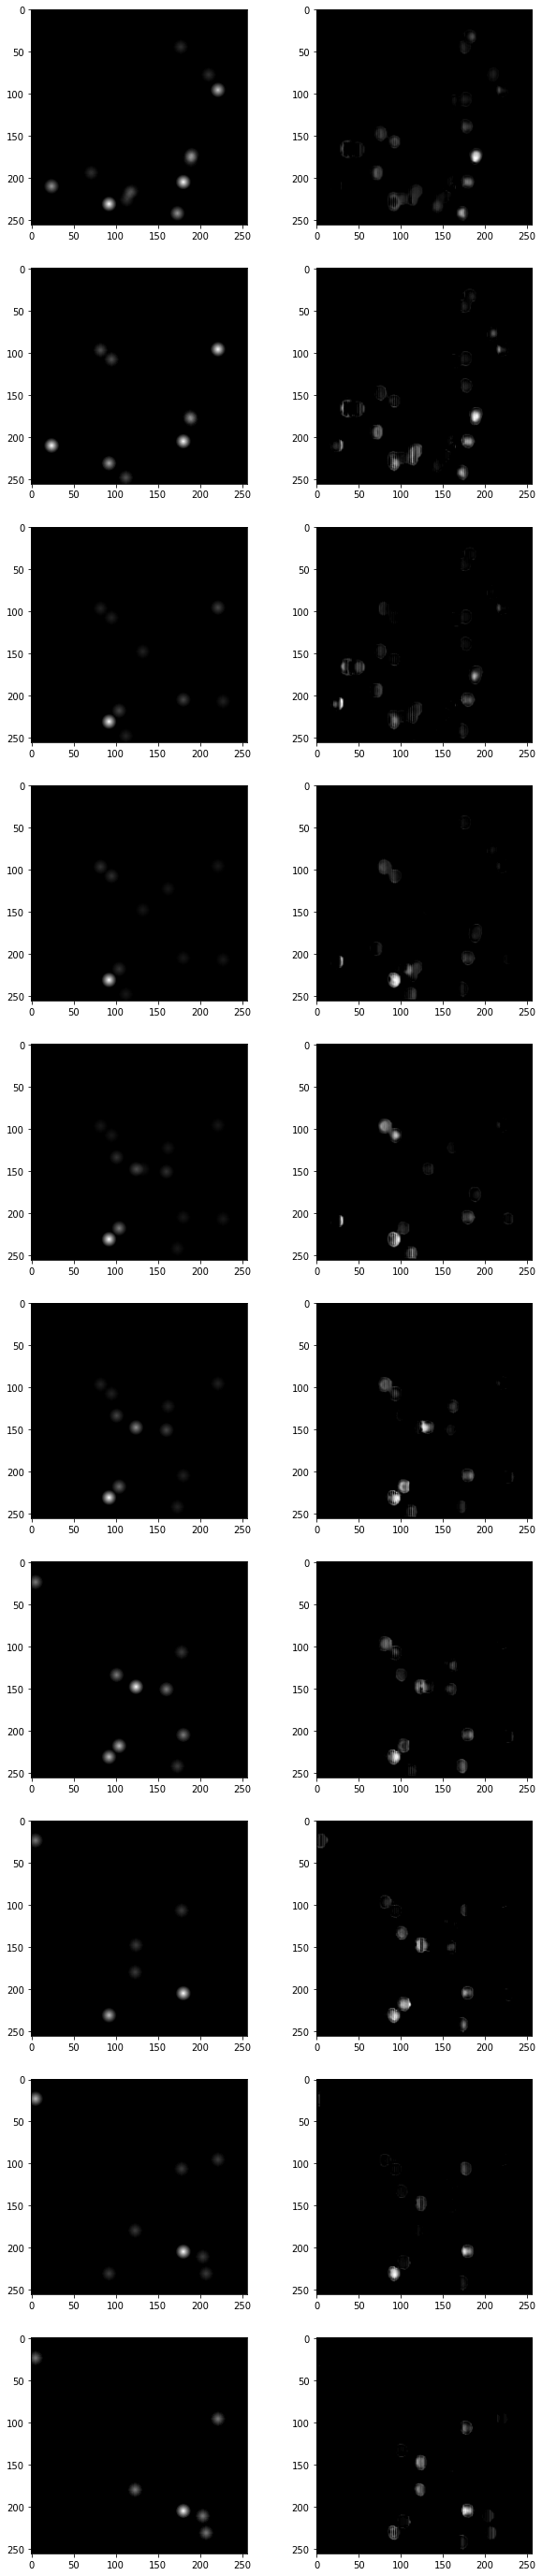

In [7]:
plt.figure(figsize=(10, 50))
for i in range(10):
    pred_image = prediction[i, ]
    pred_image = pred_image.astype('uint8')
    pred_image = Image.fromarray(pred_image, mode='L')
    
    true_image = true[i, ]
    true_image = true_image.astype('uint8')
    true_image = Image.fromarray(true_image, mode='L')
    
    plt.subplot(10, 2, (2 * i) + 1)
    plt.imshow(true_image, cmap='gray')
    
    plt.subplot(10, 2, (2 * i) + 2)
    plt.imshow(pred_image, cmap='gray')

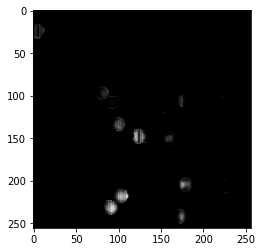

In [8]:
pred_image = prediction[7, ]
pred_image = pred_image.astype('uint8')
pred_image = Image.fromarray(pred_image, mode='L')
plt.imshow(pred_image, cmap='gray')

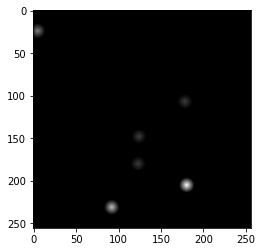

In [9]:
pred_image = true[7, ]
pred_image = pred_image.astype('uint8')
pred_image = Image.fromarray(pred_image, mode='L')
plt.imshow(pred_image, cmap='gray')

In [ ]:
# mape: 0.098